In [1]:
###
# Prerekvizity: stažení dat z webu
import requests
import os
if not os.path.exists("B2BTUR01.xls"):
    url = "https://www.chmi.cz/files/portal/docs/meteo/ok/denni_data/Denni_data_ze_stanic/files/B2BTUR01.xlsx"
    r = requests.get(url)
    open("B2BTUR01.xls", 'wb').write(r.content)

In [2]:
###
# instalace balíku pro Excel
# možná přes příkaz:
#%pip install xlrd
import pandas as pd
import numpy as np

## Načtení dat
Pomůže nám funkce `read_excel`, která bere za parametry
* soubor
* `sheet_name` - jedna hodnota nebo seznam integerových pořadí listů či jejich názvů
* `header` - na kterém řádku je hlavička

Vrací jeden DataFrame nebo sérii DataFramů (pokud je více listů)

In [3]:
df_list = pd.read_excel("B2BTUR01.xls", sheet_name=[1, 2, 3], header=3)
df_avg, df_max, df_min =  df_list.values() ###

In [4]:
# Podívejme se na data, co jsme načetli
df_avg

,rok,měsíc,1.,2.,3.,4.,5.,6.,7.,8.,...,22.,23.,24.,25.,26.,27.,28.,29.,30.,31.
0,1961,1,-0.8,-0.4,1.5,2.1,1.1,1.4,-0.3,0.8,...,-4.4,-3.2,-4.9,-7.0,-10.3,-9.4,-7.6,-6.8,-3.2,1.1
1,1961,2,1.7,1.3,1.9,0.6,-1.7,-3.3,-1.2,0.7,...,3.2,4.3,3.7,1.8,0.8,3.3,3.8,NaN,NaN,NaN
2,1961,3,2.8,1.9,3.7,4.7,4.9,5.0,7.1,7.8,...,-0.4,4.8,7.8,8.5,8.2,5.7,2.0,4.7,7.4,7.3
3,1961,4,8.2,9.6,9.6,9.5,13.8,15.0,17.2,14.2,...,10.8,11.2,12.1,10.8,13.6,13.3,11.0,12.5,13.1,NaN
4,1961,5,13.7,13.2,12.6,13.4,15.9,16.3,15.8,10.0,...,13.6,12.1,14.9,16.8,17.9,17.1,11.3,10.4,9.6,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2021,8,18.6,18.8,20.4,18.7,15.9,17.6,22.0,18.4,...,20.8,18.2,15.7,14.7,13.4,13.0,13.9,14.3,14.2,15.9
728,2021,9,16.5,16.0,16.3,18.2,16.5,16.4,16.6,17.1,...,12.4,14.9,16.8,18.3,17.8,15.9,17.1,13.4,11.8,NaN
729,2021,10,10.9,12.9,15.6,17.0,18.9,11.3,13.2,10.9,...,7.6,6.0,5.2,7.1,6.4,7.6,6.9,7.9,10.8,10.6
730,2021,11,9.8,6.9,7.7,8.6,6.2,3.1,5.9,6.3,...,5.6,3.6,2.0,2.9,0.9,-0.1,1.0,0.8,0.6,NaN


In [5]:
# A na datové typy
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rok     732 non-null    int64  
 1   měsíc   732 non-null    int64  
 2   1.      732 non-null    float64
 3   2.      732 non-null    float64
 4   3.      732 non-null    float64
 5   4.      732 non-null    float64
 6   5.      732 non-null    float64
 7   6.      732 non-null    float64
 8   7.      732 non-null    float64
 9   8.      732 non-null    float64
 10  9.      732 non-null    float64
 11  10.     732 non-null    float64
 12  11.     732 non-null    float64
 13  12.     732 non-null    float64
 14  13.     732 non-null    float64
 15  14.     732 non-null    float64
 16  15.     732 non-null    float64
 17  16.     732 non-null    float64
 18  17.     732 non-null    float64
 19  18.     732 non-null    float64
 20  19.     732 non-null    float64
 21  20.     732 non-null    float64
 22  21

In [6]:
# Nyní musíme napsat funkci, která nám upraví (vyčistí dataframe)
# - do "stacked" formátu, název sloupce bude podle parametru value_name
# - odstraní diakritiku ze sloupce (funkce rename)
# - přetypuje den ze stringu do do integeru (a odstraní tečku)

def df_update(df : pd.DataFrame, value_name : str) -> pd.DataFrame: ###
    df = df.melt(value_vars=df.columns[2:].values, var_name="den", 
                value_name=value_name, id_vars=["rok", "měsíc"]
                ).rename(columns = {"měsíc": "mesic"}
                )
    df = df.assign(den = df["den"].str.replace(".", "", regex=False).astype("int"))
    return df ###

df_update(df_avg, "temp_avg") ###

,rok,mesic,den,temp_avg
0,1961,1,1,-0.8
1,1961,2,1,1.7
2,1961,3,1,2.8
3,1961,4,1,8.2
4,1961,5,1,13.7
...,...,...,...,...
22687,2021,8,31,15.9
22688,2021,9,31,NaN
22689,2021,10,31,10.6
22690,2021,11,31,NaN


In [7]:
###
# Provedeme pro všechny dataframy
df_avg_s = df_update(df_avg, "temp_avg")
df_min_s = df_update(df_min, "temp_min")
df_max_s = df_update(df_max, "temp_max")

In [9]:
# nyí všechny DataFrame musíme spojit dohromady
# - varianta jedna pomocí merge
pd.merge(pd.merge(df_avg_s, df_min_s, on=["rok", "mesic", "den"]), df_max_s, on=["rok", "mesic", "den"])

,rok,mesic,den,temp_avg,temp_min,temp_max
0,1961,1,1,-0.8,-2.5,0.5
1,1961,2,1,1.7,-0.6,3.4
2,1961,3,1,2.8,0.0,8.6
3,1961,4,1,8.2,1.0,12.9
4,1961,5,1,13.7,8.7,20.2
...,...,...,...,...,...,...
21943,2019,8,31,24.8,16.7,31.0
21944,2019,9,31,NaN,NaN,NaN
21945,2019,10,31,3.8,-0.4,7.6
21946,2019,11,31,NaN,NaN,NaN


In [8]:
# Nastavíme správně indexy
df_avg_i = df_avg_s.set_index(["rok", "mesic", "den"])
df_min_i = df_min_s.set_index(["rok", "mesic", "den"])
df_max_i = df_max_s.set_index(["rok", "mesic", "den"])

In [9]:
# složíme data (ale správná osa)
df_all = pd.concat([df_avg_i, df_min_i, df_max_i], axis=1)
df_all

temp_avg  temp_min  temp_max
rok  mesic den                              
1961 1     1        -0.8      -2.5       0.5
     2     1         1.7      -0.6       3.4
     3     1         2.8       0.0       8.6
     4     1         8.2       1.0      12.9
     5     1        13.7       8.7      20.2
...                  ...       ...       ...
2021 8     31       15.9      11.3      18.7
     9     31        NaN       NaN       NaN
     10    31       10.6       6.5      14.6
     11    31        NaN       NaN       NaN
     12    31        7.4       2.8      13.0

[22692 rows x 3 columns]

# Hrátky s daty
Data máme připravená v pěkném formátu, můžeme se nyní dotazovat!

## Kdy u nás byla nejnižší teplota?
(7. ledna 1985)

In [10]:
# kdy u nas byla nejnizsi teplota
df_all["temp_min"].min()
df_all["temp_min"].argmin()
df_all.iloc[df_all["temp_min"].argmin()]

temp_avg   -19.9
temp_min   -24.1
temp_max   -15.4
Name: (1985, 1, 7), dtype: float64

## Jak bylo 30. října v různých rocích?

In [11]:
# jak bylo 30. rijna v ruzýnch rocich?
tmp = df_all.loc[(slice(None), 10, 30)]
tmp

,temp_avg,temp_min,temp_max
rok,,,
1961,7.0,3.0,9.6
1962,5.7,3.4,9.0
1963,4.5,-1.2,8.9
1964,6.4,5.2,10.5
1965,5.7,1.2,12.9
...,...,...,...
2017,5.1,3.0,8.4
2018,15.6,13.2,18.9
2019,4.2,2.0,9.3


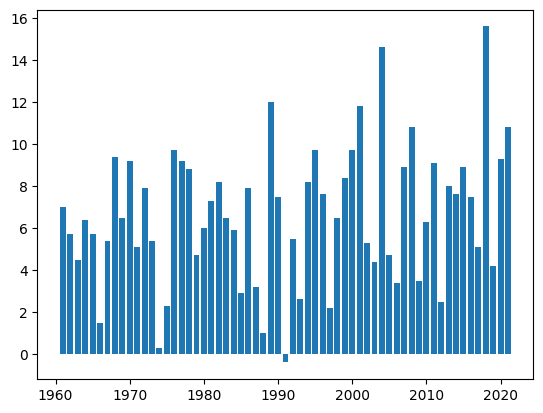

In [12]:
# Zkusme vizualizovat do sloupcového grafu
import matplotlib.pyplot as plt ###
plt.Figure() ###
plt.bar(x=tmp.index.values, height=tmp["temp_avg"].to_numpy())
plt.show() ###

## Analýza jednotlivých měsíců
Budeme hledat nějaké měsíce v historii, kdy nastaly různé jevy.

In [13]:
# Vytvořme dataframe, kde pro každý měsíc a rok bude minimální a maximální teplota
###
df_mesic = df_all.groupby(["rok", "mesic"]).agg({"temp_min": "min", "temp_max": "max"})
# Pro jednodušší práci resetujme indexy
df_mesic.reset_index(inplace=True) ###
df_mesic ###

,rok,mesic,temp_min,temp_max
0,1961,1,-16.2,7.0
1,1961,2,-8.4,10.0
2,1961,3,-3.6,21.2
3,1961,4,0.0,24.3
4,1961,5,1.8,24.7
...,...,...,...,...
727,2021,8,9.0,31.6
728,2021,9,8.3,26.1
729,2021,10,-2.3,23.0
730,2021,11,-2.9,13.8


### V kterých měsících mrzlo?

In [14]:
# V kterých měsících mrzlo?
df_mesic[df_mesic["temp_min"] < 0]

,rok,mesic,temp_min,temp_max
0,1961,1,-16.2,7.0
1,1961,2,-8.4,10.0
2,1961,3,-3.6,21.2
10,1961,11,-5.8,14.2
11,1961,12,-17.8,12.8
...,...,...,...,...
722,2021,3,-7.3,23.2
723,2021,4,-5.2,24.9
729,2021,10,-2.3,23.0
730,2021,11,-2.9,13.8


In [15]:
# mrzlo nekdy v květnu?
df_mesic[(df_mesic["temp_min"]<0) & (df_mesic["mesic"] == 5)]

,rok,mesic,temp_min,temp_max
16,1962,5,-1.0,25.0
76,1967,5,-0.2,26.5
184,1976,5,-1.6,26.2
208,1978,5,-0.6,23.9
220,1979,5,-1.0,29.7
232,1980,5,-1.9,23.6
244,1981,5,-1.3,25.8
256,1982,5,-1.7,26.5
292,1985,5,-0.6,27.9
556,2007,5,-2.0,29.4


In [16]:
# kolikrát v jednotlivých měsících mrzlo?
df_mesic[df_mesic["temp_min"] < 0].groupby("mesic")["rok"].count()

mesic
1     61
2     61
3     61
4     57
5     13
9      1
10    51
11    61
12    61
Name: rok, dtype: int64

In [18]:
# Ztratily se nám ale některé měsíce.
dfc = df_mesic[["mesic", "temp_min"]].copy()  # Vytvoříme kopii ###
# Místo toho nahradíme nenulové 
dfc.loc[dfc["temp_min"] < 0, "freeze"] = 1
dfc
dfc.groupby("mesic").agg( {"freeze" : "sum"} ) #.plot.bar()

,freeze
mesic,
1,61.0
2,61.0
3,61.0
4,57.0
5,13.0
6,0.0
7,0.0
8,0.0
9,1.0


## Jaké byly největší teplotní skoky?

In [19]:
# jake byly nejvetsi teplotni skoky?
df_range = df_mesic.copy()
df_range["range"] = df_mesic["temp_max"] - df_mesic["temp_min"]
df_range

,rok,mesic,temp_min,temp_max,range
0,1961,1,-16.2,7.0,23.2
1,1961,2,-8.4,10.0,18.4
2,1961,3,-3.6,21.2,24.8
3,1961,4,0.0,24.3,24.3
4,1961,5,1.8,24.7,22.9
...,...,...,...,...,...
727,2021,8,9.0,31.6,22.6
728,2021,9,8.3,26.1,17.8
729,2021,10,-2.3,23.0,25.3
730,2021,11,-2.9,13.8,16.7


In [20]:
# Vypiš prvních 10 měsíců, kdy byl největší teplotní skok
df_range.sort_values("range", ascending=False).head(10)

,rok,mesic,temp_min,temp_max,range
122,1971,3,-16.7,19.3,36.0
492,2002,1,-18.8,15.7,34.5
676,2017,5,-1.3,31.8,33.1
615,2012,4,-3.6,29.5,33.1
445,1998,2,-17.0,15.6,32.6
86,1968,3,-8.0,24.3,32.3
627,2013,4,-6.3,25.9,32.2
507,2003,4,-6.3,25.8,32.1
530,2005,3,-14.5,17.4,31.9
312,1987,1,-23.2,8.4,31.6


In [21]:
df_range.nlargest(columns="range", n=10)

,rok,mesic,temp_min,temp_max,range
122,1971,3,-16.7,19.3,36.0
492,2002,1,-18.8,15.7,34.5
615,2012,4,-3.6,29.5,33.1
676,2017,5,-1.3,31.8,33.1
445,1998,2,-17.0,15.6,32.6
86,1968,3,-8.0,24.3,32.3
627,2013,4,-6.3,25.9,32.2
507,2003,4,-6.3,25.8,32.1
530,2005,3,-14.5,17.4,31.9
312,1987,1,-23.2,8.4,31.6


## Můžeme se vrátit zpět k formátu z CHMI?

In [24]:
df_all.dropna().unstack(level="den")["temp_avg"]

den           1     2     3     4     5     6     7     8     9     10  ...  \
rok  mesic                                                              ...   
1961 1      -0.8  -0.4   1.5   2.1   1.1   1.4  -0.3   0.8   0.8   0.4  ...   
     2       1.7   1.3   1.9   0.6  -1.7  -3.3  -1.2   0.7   1.0   2.5  ...   
     3       2.8   1.9   3.7   4.7   4.9   5.0   7.1   7.8   8.0   7.9  ...   
     4       8.2   9.6   9.6   9.5  13.8  15.0  17.2  14.2   7.5   6.0  ...   
     5      13.7  13.2  12.6  13.4  15.9  16.3  15.8  10.0   9.0   9.7  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2019 8      23.9  21.1  17.3  19.9  21.5  23.0  22.4  21.9  23.8  21.9  ...   
     9      25.0  16.7  16.3  17.4  20.3  17.0  14.4  14.5  14.5  15.0  ...   
     10     16.3  12.7   9.2  10.3   9.8   7.4   5.1   8.4  10.9   9.6  ...   
     11      5.0   6.7  14.6  11.2   8.3   8.8   8.4  10.2   6.9   5.2  ...   
     12      0.1   0.3   0.5  -1.5  -1.1  -1.0   0.7   4.2   2.6   1.3  ...   

den           22    23    24    25    26    27    28    29    30    31  
rok  mesic                                                              
1961 1      -4.4  -3.2  -4.9  -7.0 -10.3  -9.4  -7.6  -6.8  -3.2   1.1  
     2       3.2   4.3   3.7   1.8   0.8   3.3   3.8   NaN   NaN   NaN  
     3      -0.4   4.8   7.8   8.5   8.2   5.7   2.0   4.7   7.4   7.3  
     4      10.8  11.2  12.1  10.8  13.6  13.3  11.0  12.5  13.1   NaN  
     5      13.6  12.1  14.9  16.8  17.9  17.1  11.3  10.4   9.6  14.8  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2019 8      19.1  21.6  24.4  23.3  21.9  23.0  25.4  25.3  24.3  24.8  
     9      14.8  15.9  15.7  15.6  14.0  16.5  15.3  16.1  16.0   NaN  
     10     15.0  15.8  16.7  13.0  10.5  10.7   7.7   6.7   4.2   3.8  
     11      8.8   6.9   6.4   7.7   5.1   6.5   6.0   5.9   0.1   NaN  
     12      2.9   6.8   5.2   5.1   4.2   3.0   0.6  -1.0  -1.6   1.0  

[708 rows x 31 columns]